Predicting Views for Music Track.

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor


#df = pd.read_csv("/content/drive/MyDrive/Spotify_Youtube.csv", encoding='latin-1')
df = pd.read_csv("Spotify_Youtube.csv", encoding='latin-1')


In [15]:
df.head(4)

Unnamed: 0    Artist                                        Url_spotify  \
0           0  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
1           1  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
2           2  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
3           3  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   

                                           Track  \
0                                 Feel Good Inc.   
1                                Rhinestone Eyes   
2  New Gold (feat. Tame Impala and Bootie Brown)   
3                             On Melancholy Hill   

                                           Album Album_type  \
0                                     Demon Days      album   
1                                  Plastic Beach      album   
2  New Gold (feat. Tame Impala and Bootie Brown)     single   
3                                  Plastic Beach      album   

                                    Uri  Danceability  Energy  Key  ...  \
0  spotify:track:0d28khcov6AiegSCpG5TuT         0.818   0.705  6.0  ...   
1  spotify:track:1foMv2HQwfQ2vntFf9HFeG         0.676   0.703  8.0  ...   
2  spotify:track:64dLd6rVqDLtkXFYrEUHIU         0.695   0.923  1.0  ...   
3  spotify:track:0q6LuUqGLUiCPP1cbdwFs3         0.689   0.739  2.0  ...   

                                   Url_youtube  \
0  https://www.youtube.com/watch?v=HyHNuVaZJ-k   
1  https://www.youtube.com/watch?v=yYDmaexVHic   
2  https://www.youtube.com/watch?v=qJa-VFwPpYA   
3  https://www.youtube.com/watch?v=04mfKJWDSzI   

                                               Title   Channel        Views  \
0         Gorillaz - Feel Good Inc. (Official Video)  Gorillaz  693555221.0   
1  Gorillaz - Rhinestone Eyes [Storyboard Film] (...  Gorillaz   72011645.0   
2  Gorillaz - New Gold ft. Tame Impala & Bootie B...  Gorillaz    8435055.0   
3     Gorillaz - On Melancholy Hill (Official Video)  Gorillaz  211754952.0   

       Likes  Comments                                        Description  \
0  6220896.0  169907.0  Official HD Video for Gorillaz' fantastic trac...   
1  1079128.0   31003.0  The official video for Gorillaz - Rhinestone E...   
2   282142.0    7399.0  Gorillaz - New Gold ft. Tame Impala & Bootie B...   
3  1788577.0   55229.0  Follow Gorillaz online:\nhttp://gorillaz.com \...   

   Licensed official_video        Stream  
0      True           True  1.040235e+09  
1      True           True  3.100837e+08  
2      True           True  6.306347e+07  
3      True           True  4.346636e+08  

[4 rows x 28 columns]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        20718 non-null  int64  
 1   Artist            20718 non-null  object 
 2   Url_spotify       20718 non-null  object 
 3   Track             20718 non-null  object 
 4   Album             20718 non-null  object 
 5   Album_type        20718 non-null  object 
 6   Uri               20718 non-null  object 
 7   Danceability      20716 non-null  float64
 8   Energy            20716 non-null  float64
 9   Key               20716 non-null  float64
 10  Loudness          20716 non-null  float64
 11  Speechiness       20716 non-null  float64
 12  Acousticness      20716 non-null  float64
 13  Instrumentalness  20716 non-null  float64
 14  Liveness          20716 non-null  float64
 15  Valence           20716 non-null  float64
 16  Tempo             20716 non-null  float6

In [17]:
df.shape

(20718, 28)

# **Data Preprocesing**

In [18]:
# Drop duplicate rows, if any
df.drop_duplicates(inplace=True)

In [19]:
# Check for missing values in the DataFrame
missing_values = df.isnull().sum()

# Display missing values, if any
print("Missing Values:")
print(missing_values[missing_values > 0])

Missing Values:
Danceability          2
Energy                2
Key                   2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Url_youtube         470
Title               470
Channel             470
Views               470
Likes               541
Comments            569
Description         876
Licensed            470
official_video      470
Stream              576
dtype: int64


In [20]:
df.dropna(inplace=True)

In [21]:
# Check for missing values in the DataFrame
missing_values = df.isnull().sum()

# Display missing values, if any
print("Missing Values:")
print(missing_values[missing_values > 0])

Missing Values:
Series([], dtype: int64)


In [22]:
#dropping Uri and Url_youtube as they are not really required for analysis
df = df.drop(['Uri', 'Url_youtube','Description','Unnamed: 0','Url_spotify'], axis=1)

In [23]:
df.shape

(19170, 23)

In [24]:
# Convert 'Licensed' and 'official_video' columns to boolean
df['Licensed'] = df['Licensed'].astype(bool)
df['official_video'] = df['official_video'].astype(bool)

In [25]:
# Convert 'Stream' column to integer
df['Stream'] = df['Stream'].astype(int)

In [26]:
# Convert 'Duration_ms' to minutes for better readability
df['Duration_minutes'] = df['Duration_ms'] / (1000 * 60)
df = df.drop('Duration_ms', axis=1)

In [27]:
# Convert 'Danceability', 'Energy', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence' to percentage for better interpretation
df[['Danceability', 'Energy', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence']] *= 100

In [28]:
df.head()

Artist                                          Track  \
0  Gorillaz                                 Feel Good Inc.   
1  Gorillaz                                Rhinestone Eyes   
2  Gorillaz  New Gold (feat. Tame Impala and Bootie Brown)   
3  Gorillaz                             On Melancholy Hill   
4  Gorillaz                                 Clint Eastwood   

                                           Album Album_type  Danceability  \
0                                     Demon Days      album          81.8   
1                                  Plastic Beach      album          67.6   
2  New Gold (feat. Tame Impala and Bootie Brown)     single          69.5   
3                                  Plastic Beach      album          68.9   
4                                       Gorillaz      album          66.3   

   Energy   Key  Loudness  Speechiness  Acousticness  ...    Tempo  \
0    70.5   6.0    -6.679        17.70       0.83600  ...  138.559   
1    70.3   8.0    -5.815         3.02       8.69000  ...   92.761   
2    92.3   1.0    -3.930         5.22       4.25000  ...  108.014   
3    73.9   2.0    -5.810         2.60       0.00151  ...  120.423   
4    69.4  10.0    -8.627        17.10       2.53000  ...  167.953   

                                               Title   Channel        Views  \
0         Gorillaz - Feel Good Inc. (Official Video)  Gorillaz  693555221.0   
1  Gorillaz - Rhinestone Eyes [Storyboard Film] (...  Gorillaz   72011645.0   
2  Gorillaz - New Gold ft. Tame Impala & Bootie B...  Gorillaz    8435055.0   
3     Gorillaz - On Melancholy Hill (Official Video)  Gorillaz  211754952.0   
4         Gorillaz - Clint Eastwood (Official Video)  Gorillaz  618480958.0   

       Likes  Comments  Licensed  official_video      Stream  Duration_minutes  
0  6220896.0  169907.0      True            True  1040234854          3.710667  
1  1079128.0   31003.0      True            True   310083733          3.336217  
2   282142.0    7399.0      True            True    63063467          3.585833  
3  1788577.0   55229.0      True            True   434663559          3.897783  
4  6197318.0  155930.0      True            True   617259738          5.682000  

[5 rows x 23 columns]

We will try to find and handle outliers in our dataset.

In [29]:
from scipy import stats

# Calculate Z-scores
z_scores = stats.zscore(df.select_dtypes(include=[np.number]))

df_numeric = df.select_dtypes(include=[np.number])

# Get absolute Z-scores greater than 3
df_outliers = df_numeric[(np.abs(z_scores) > 3).any(axis=1)]

print(df_outliers)

       Danceability  Energy   Key  Loudness  Speechiness  Acousticness  \
0              81.8    70.5   6.0    -6.679        17.70         0.836   
4              66.3    69.4  10.0    -8.627        17.10         2.530   
10             59.2    76.7   9.0    -2.788         2.70         0.210   
11             55.9    34.5   4.0   -13.496         4.59         5.760   
20             90.2    72.0   6.0    -2.776        34.70        26.000   
...             ...     ...   ...       ...          ...           ...   
20652          43.7   100.0   2.0   -24.185         4.70        91.100   
20653          37.9    99.8   0.0   -24.146        17.60        95.300   
20654          23.6    99.5   2.0   -24.726         3.37        88.000   
20716          41.7    76.7   9.0    -4.004        41.90        35.600   
20717          49.8    93.8   6.0    -4.543        10.70         0.277   

       Instrumentalness  Liveness  Valence    Tempo         Views       Likes  \
0                0.2330     61

In [30]:
# Calculate Z-scores
z_scores = stats.zscore(df.select_dtypes(include=[np.number]))

# Get absolute Z-scores less than or equal to 3
df_no_outliers = df[(np.abs(z_scores) <= 3).all(axis=1)]

print(df_no_outliers)

            Artist                                              Track  \
1         Gorillaz                                    Rhinestone Eyes   
2         Gorillaz      New Gold (feat. Tame Impala and Bootie Brown)   
3         Gorillaz                                 On Melancholy Hill   
5         Gorillaz                                               DARE   
6         Gorillaz  New Gold (feat. Tame Impala and Bootie Brown) ...   
...            ...                                                ...   
20711  SICK LEGEND              MIDDLE OF THE NIGHT - HARDSTYLE REMIX   
20712  SICK LEGEND             EVERYTIME WE TOUCH HARDSTYLE (SPED UP)   
20713  SICK LEGEND                               JUST DANCE HARDSTYLE   
20714  SICK LEGEND                     SET FIRE TO THE RAIN HARDSTYLE   
20715  SICK LEGEND                          OUTSIDE HARDSTYLE SPED UP   

                                                   Album Album_type  \
1                                          Plastic B

In [31]:
df=df_no_outliers

# **Exploratory Data Analysis (EDA)**



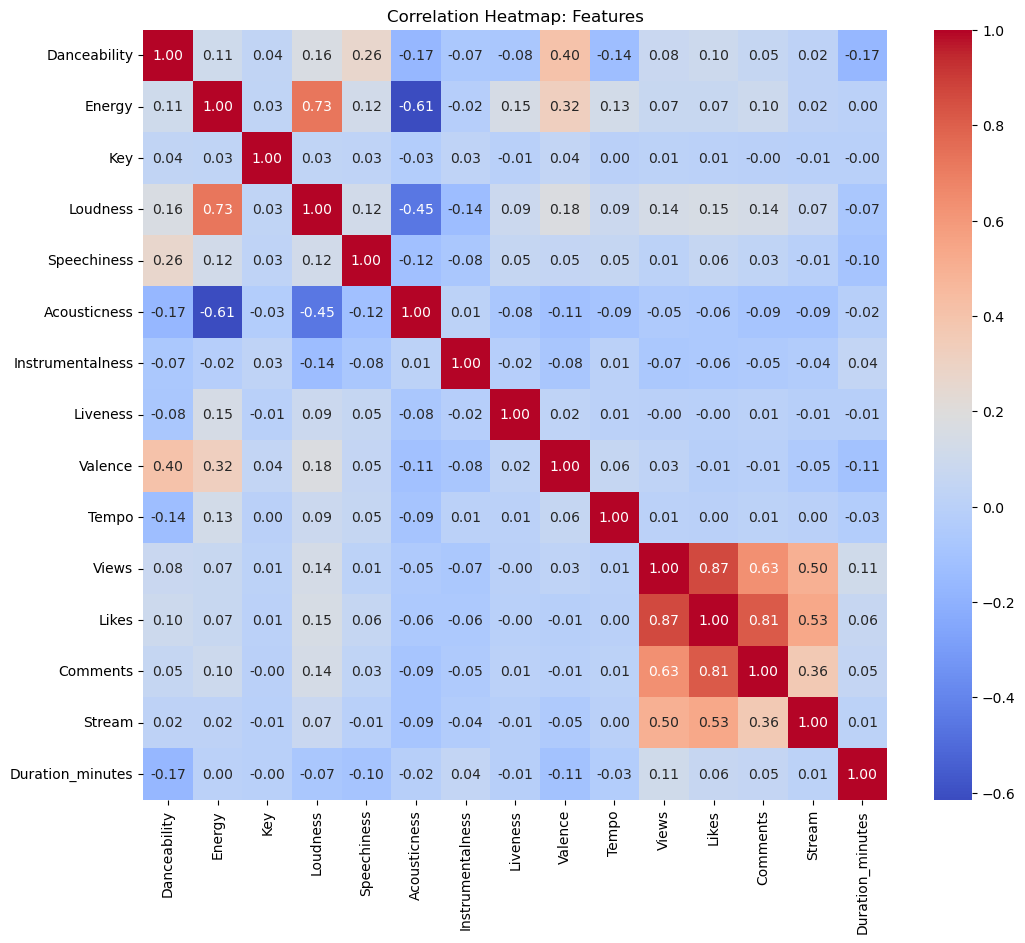

In [32]:
# Select relevant numerical columns for correlation analysis
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Create a correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Ploting a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Features')
plt.show()

High Positive Correlation:

- Danceability and Valence have a relatively high positive correlation coefficient of 0.40. This strong positive correlation between the two suggests that songs that are easier to dance to tend to have a more positive mood. This makes sense as danceable music is often upbeat.

- Energy and Loudness show a strong positive correlation of 0.73.

High Negative Correlation:

- Acousticness and Energy have a strong negative correlation of -0.61. It suggests that acoustic songs tend to be less energetic, which is consistent with the general characteristics of acoustic music.


Potential Multicollinearity:

- Energy and Loudness have a strong positive correlation, suggesting that including both in a regression model might lead to multicollinearity issues.
Danceability and Valence also have a moderate positive correlation, which could be considered when including them in a model together.

Weak Correlation:

- Views, Likes, and Comments don't show strong correlations with other audio features, which might indicate that the popularity metrics on YouTube are not strongly influenced by the audio characteristics. It can be assummed that it might be influenced by factors beyond the audio characteristics, such as marketing, artist popularity, video content, etc

Duration_minutes:

- The duration of the track doesn't show strong correlations with other audio features or popularity metrics.

In [33]:
# Select features for VIF analysis
features_for_vif = df[['Danceability', 'Energy', 'Valence', 'Loudness', 'Acousticness', 'Instrumentalness', 'Tempo', 'Duration_minutes']]

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = features_for_vif.columns
vif_data["VIF"] = [variance_inflation_factor(features_for_vif.values, i) for i in range(features_for_vif.shape[1])]

# Print VIF results
print(vif_data)

           Variable        VIF
0      Danceability  16.593121
1            Energy  20.511625
2           Valence   8.520890
3          Loudness   8.835452
4      Acousticness   2.794896
5  Instrumentalness   1.087100
6             Tempo  16.064278
7  Duration_minutes  13.181949


Danceability and Energy:
Both variables have high VIF values (above 10), indicating a strong correlation between Danceability and Energy. This suggests multicollinearity issues.

Tempo:
Tempo also has a high VIF value, indicating a potential issue with multicollinearity.

Valence, Loudness, Acousticness, Duration_minutes:
These variables have VIF values below 10, suggesting lower levels of multicollinearity.

Instrumentalness:
Instrumentalness has a relatively low VIF, indicating a lower risk of multicollinearity with other variables.

In [34]:
#Descriptive Statistics:
descriptive_stats = df.describe()
print(descriptive_stats)

       Danceability        Energy           Key      Loudness   Speechiness  \
count  16524.000000  16524.000000  16524.000000  16524.000000  16524.000000   
mean      63.400865     65.158315      5.305374     -6.990280      8.871636   
std       15.268120     19.225469      3.591677      3.089776      8.397394   
min       13.000000      2.520000      0.000000    -21.464000      2.200000   
25%       53.400000     52.700000      2.000000     -8.371250      3.530000   
50%       64.700000     67.300000      5.000000     -6.364500      5.050000   
75%       74.700000     80.000000      8.000000     -4.871000     10.300000   
max       97.500000     99.800000     11.000000      0.829000     40.900000   

       Acousticness  Instrumentalness      Liveness       Valence  \
count  16524.000000      16524.000000  16524.000000  16524.000000   
mean      26.676319          1.522018     17.299790     54.443791   
std       26.511252          6.897671     12.204614     23.677567   
min        0

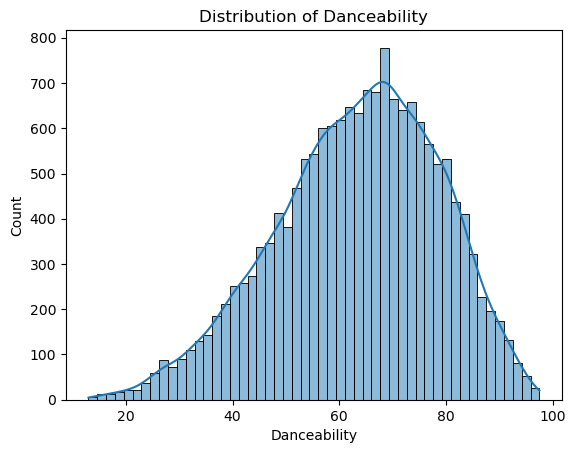

In [35]:
#Distribution Analysis (for 'Danceability' as an example)
sns.histplot(df['Danceability'], kde=True)
plt.title('Distribution of Danceability')
plt.show()

The distribution appears to follow a normal distribution (bell curve), peaking around the 60 mark on the danceability scale. This indicates that most songs in this dataset have a moderate level of danceability, with fewer songs being at the extremes

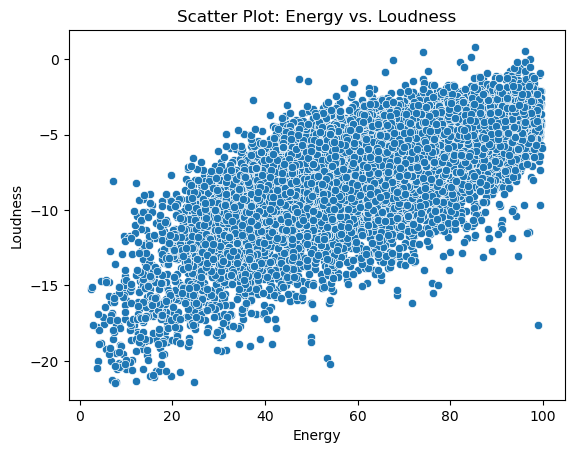

In [36]:
#Feature Relationships (scatter plot for 'Energy' vs. 'Loudness')
sns.scatterplot(x='Energy', y='Loudness', data=df)
plt.title('Scatter Plot: Energy vs. Loudness')
plt.show()

The Scatter Plot shows a clear positive correlation between the variables Energy and Loudness. This positive correlation suggests that songs with higher energy tend to have higher loudness, and songs with lower energy tend to have lowerloudness. This could be interpreted as songs that are more energetic are louder as well.

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from itertools import combinations

def calculate_vif(df):
    vif = pd.DataFrame()
    vif["Variable"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif

def handle_multicollinearity(df, threshold=5.0):
    feature_combinations = []
    for r in range(len(df.columns), 0, -1):
        feature_combinations.extend(combinations(df.columns, r))

    min_vif_df = None
    min_max_vif = float('inf')

    for feature_combination in feature_combinations:
        temp_df = df[list(feature_combination)]
        if temp_df.shape[1] == 1:  # Skip VIF calculation for single feature
            continue
        max_vif = calculate_vif(temp_df)['VIF'].max()
        if max_vif < threshold and max_vif < min_max_vif:
            min_max_vif = max_vif
            min_vif_df = temp_df

    return min_vif_df

# Select features for VIF analysis
features_for_vif = df[['Danceability', 'Energy', 'Valence', 'Loudness', 'Acousticness', 'Instrumentalness', 'Tempo', 'Duration_minutes']]

# Handle multicollinearity
df_after_vif = handle_multicollinearity(features_for_vif, threshold=10.0)

print(df_after_vif.columns)


Index(['Acousticness', 'Instrumentalness'], dtype='object')


Based on the VIF analysis it is found that the features danceability, Dancebility, Energy, Loudness, Valence, Duration_minutes and Tempo have a very high VIF and they do not meet the threshold value of 10. Hence we are dropping these columns from our dataframe.

In [39]:
# List of features to remove
features_to_remove = ['Danceability', 'Energy', 'Valence', 'Loudness', 'Tempo', 'Duration_minutes']


# Remove unwanted features from the DataFrame
df = df.drop(features_to_remove, axis=1)

print(df.columns)

Index(['Artist', 'Track', 'Album', 'Album_type', 'Key', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Title', 'Channel',
       'Views', 'Likes', 'Comments', 'Licensed', 'official_video', 'Stream'],
      dtype='object')


# Performing Univariate Analysis

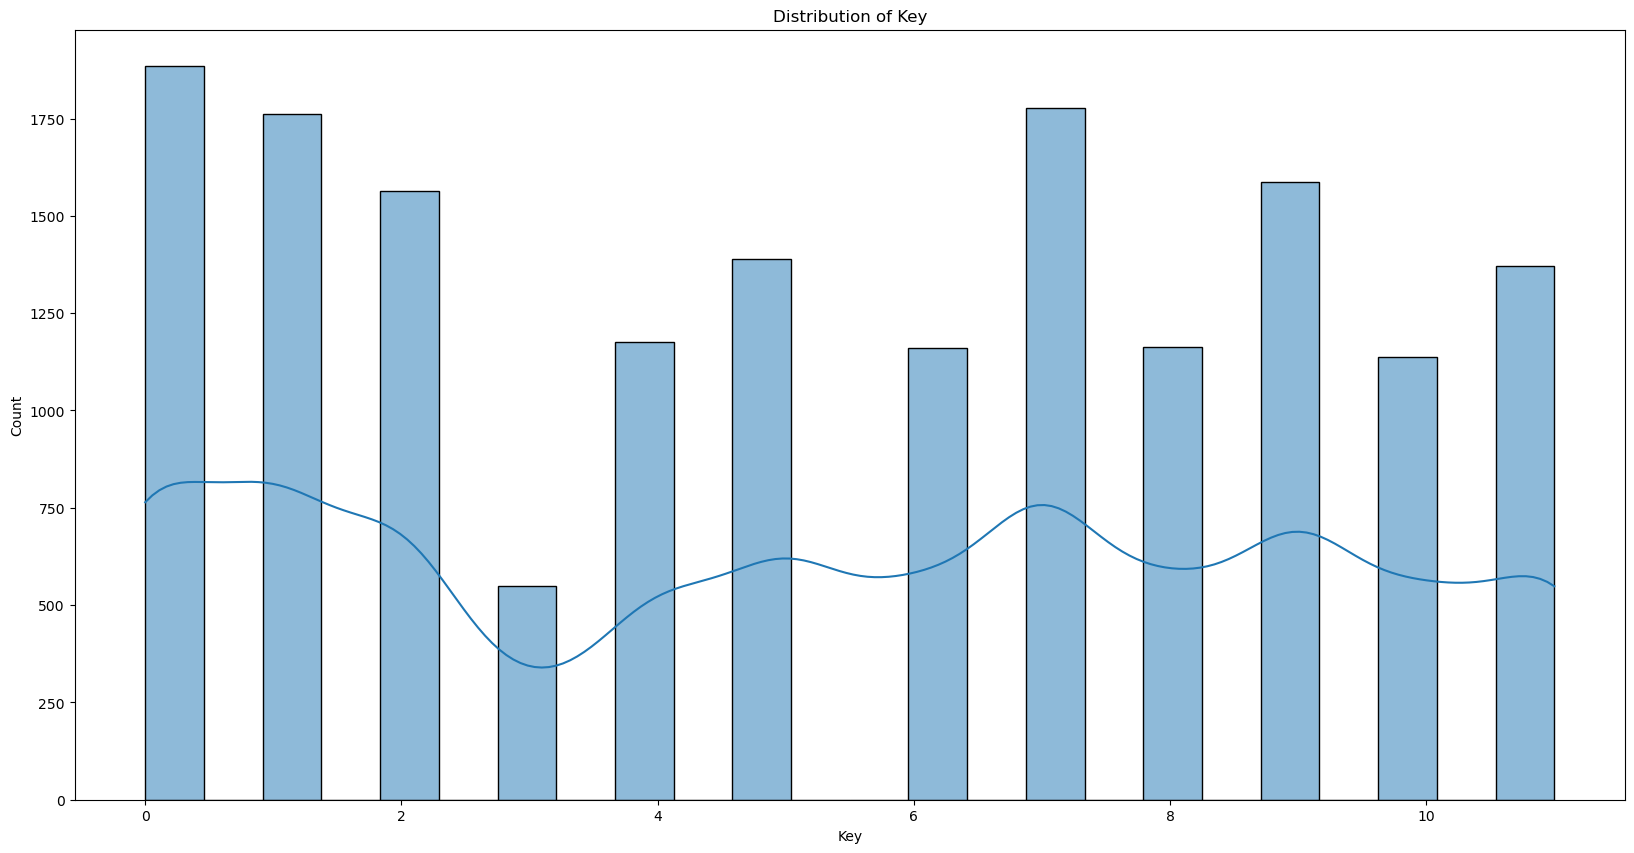

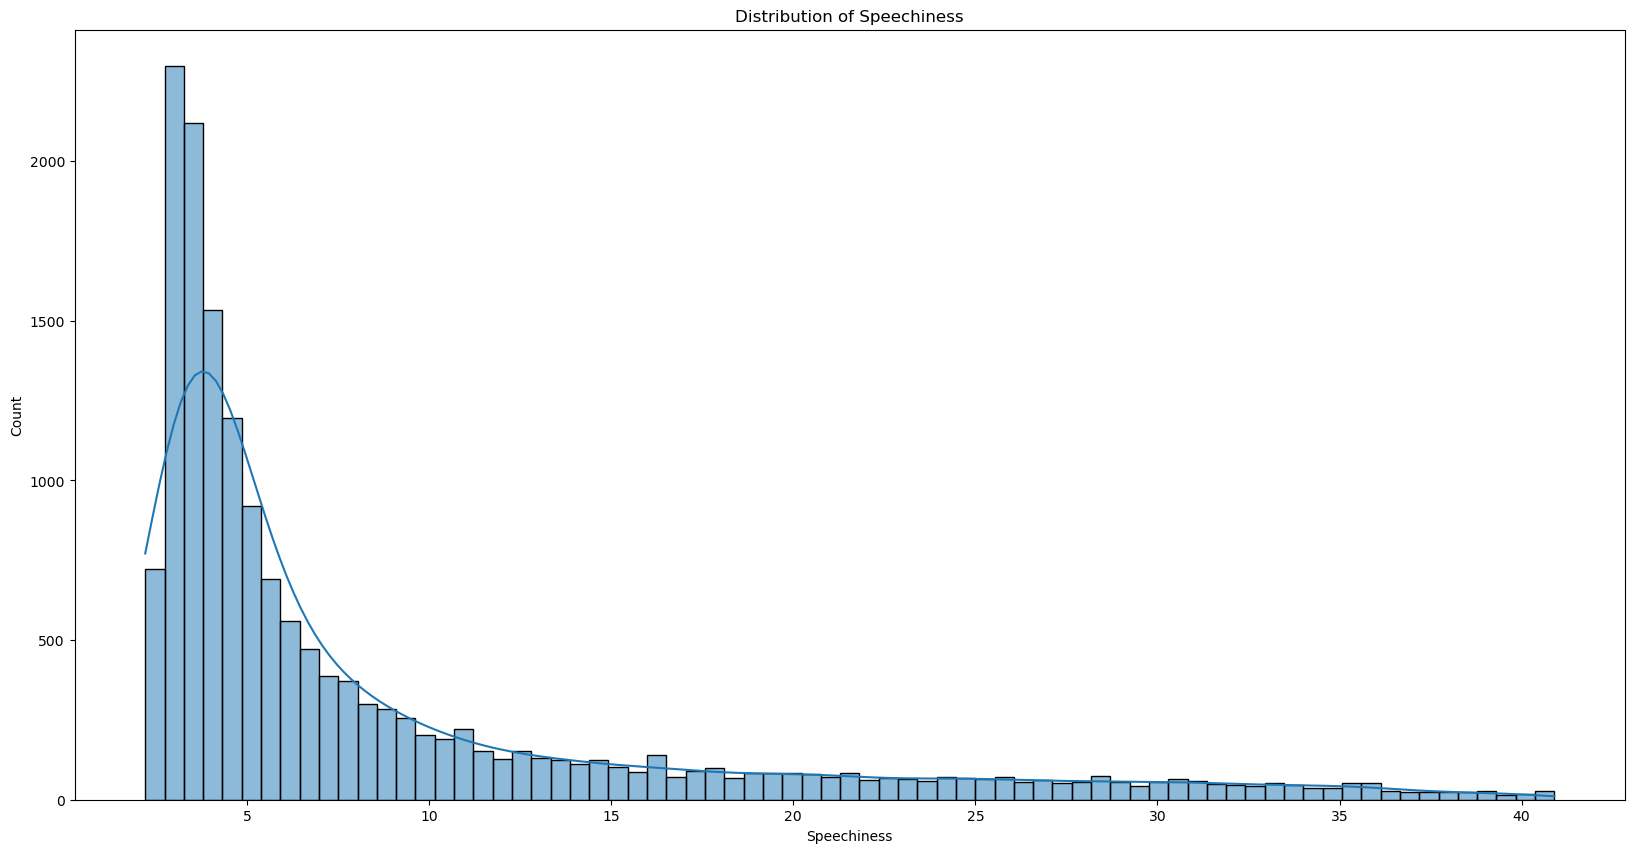

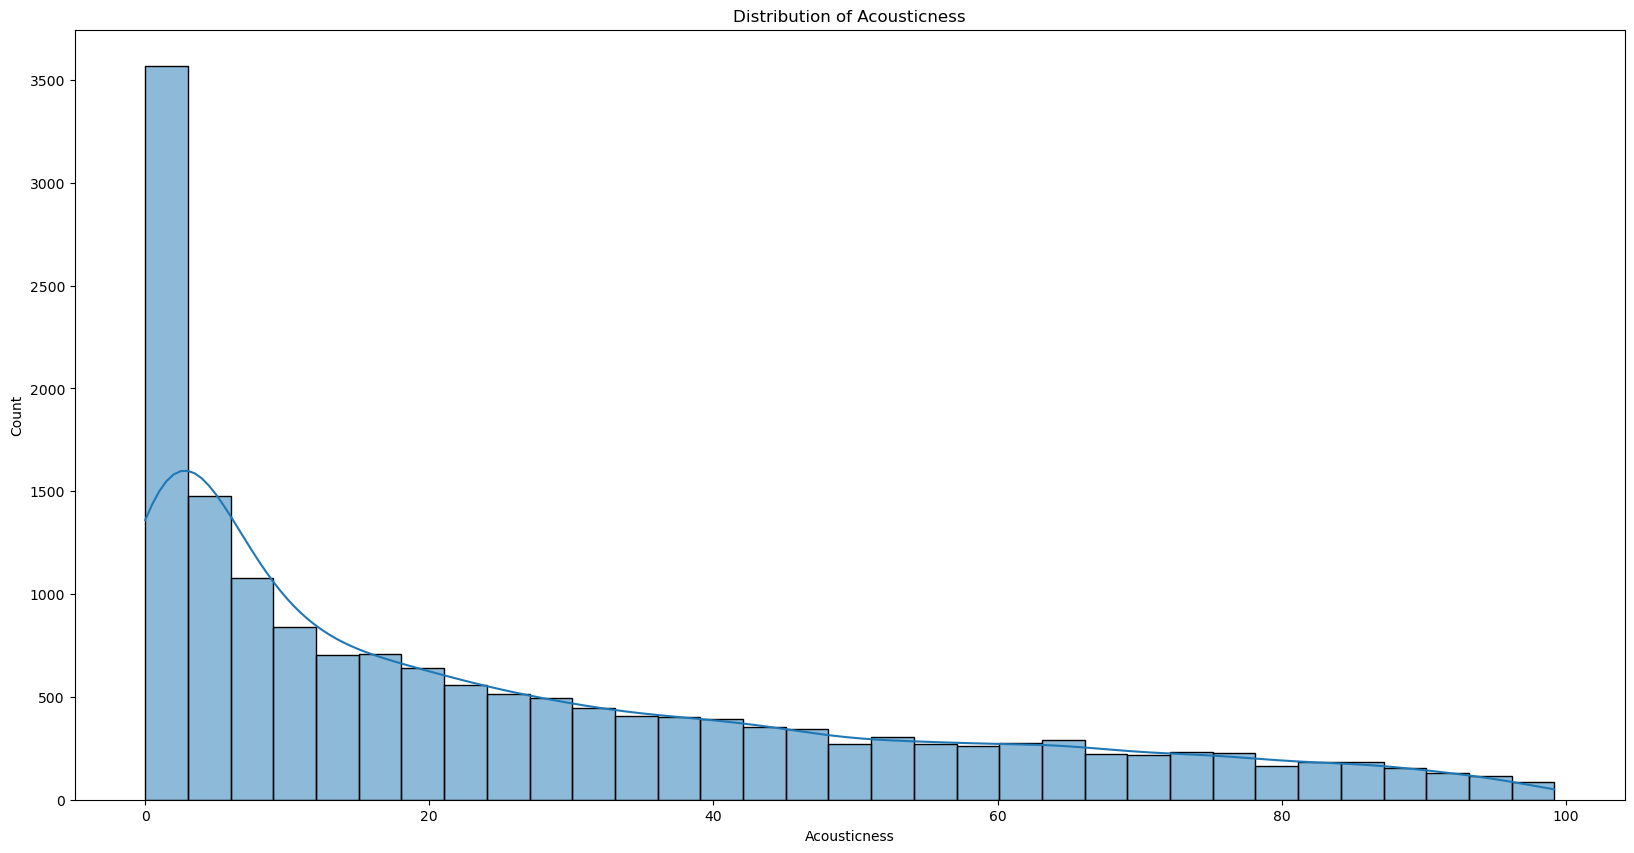

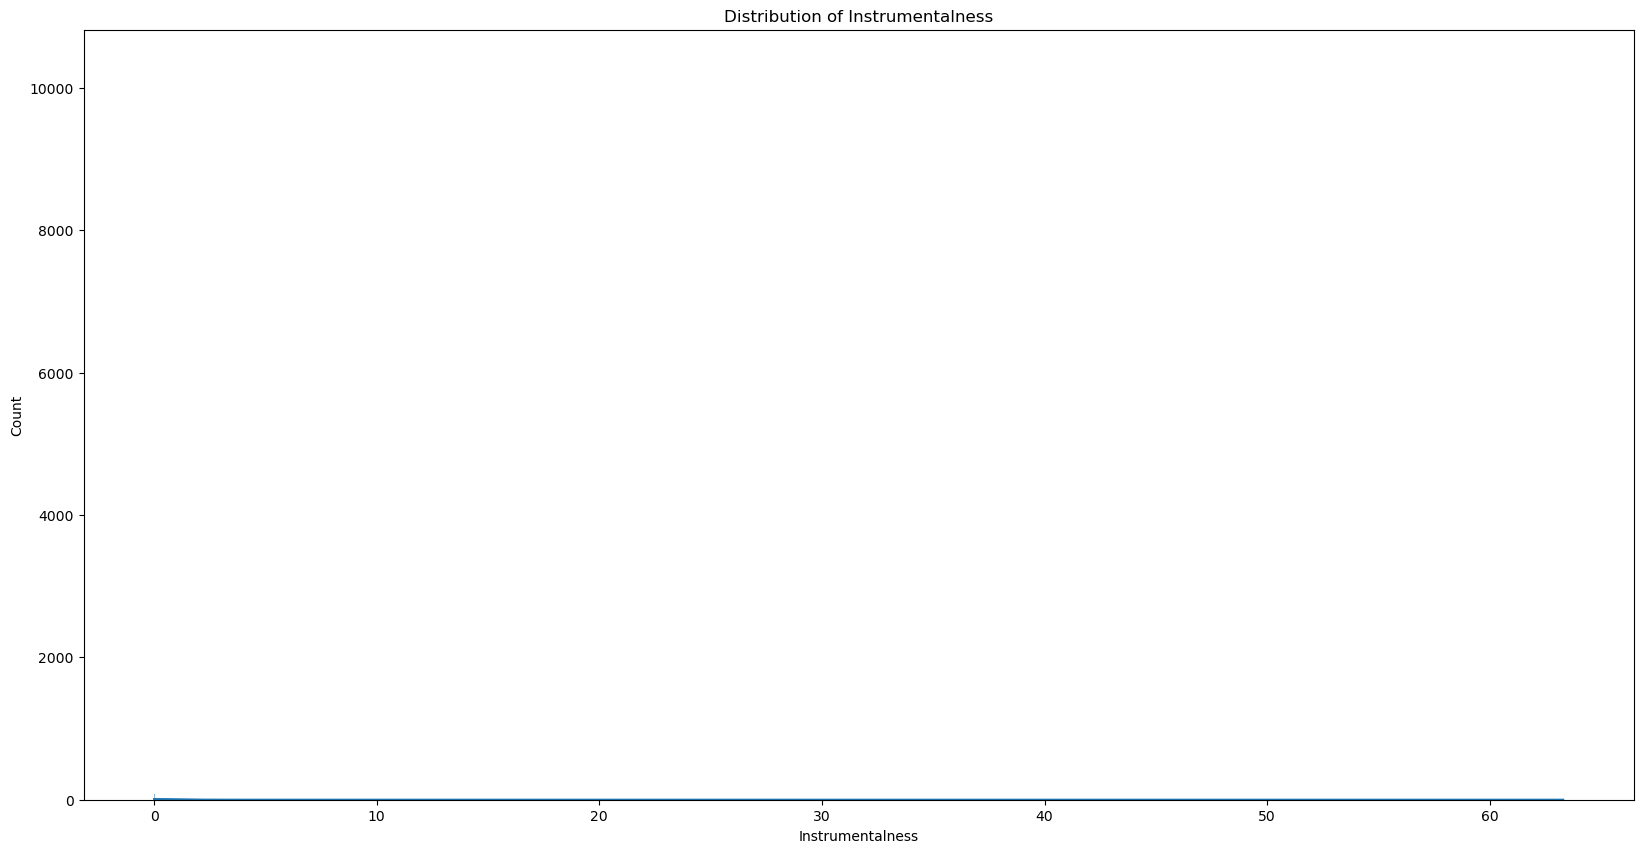

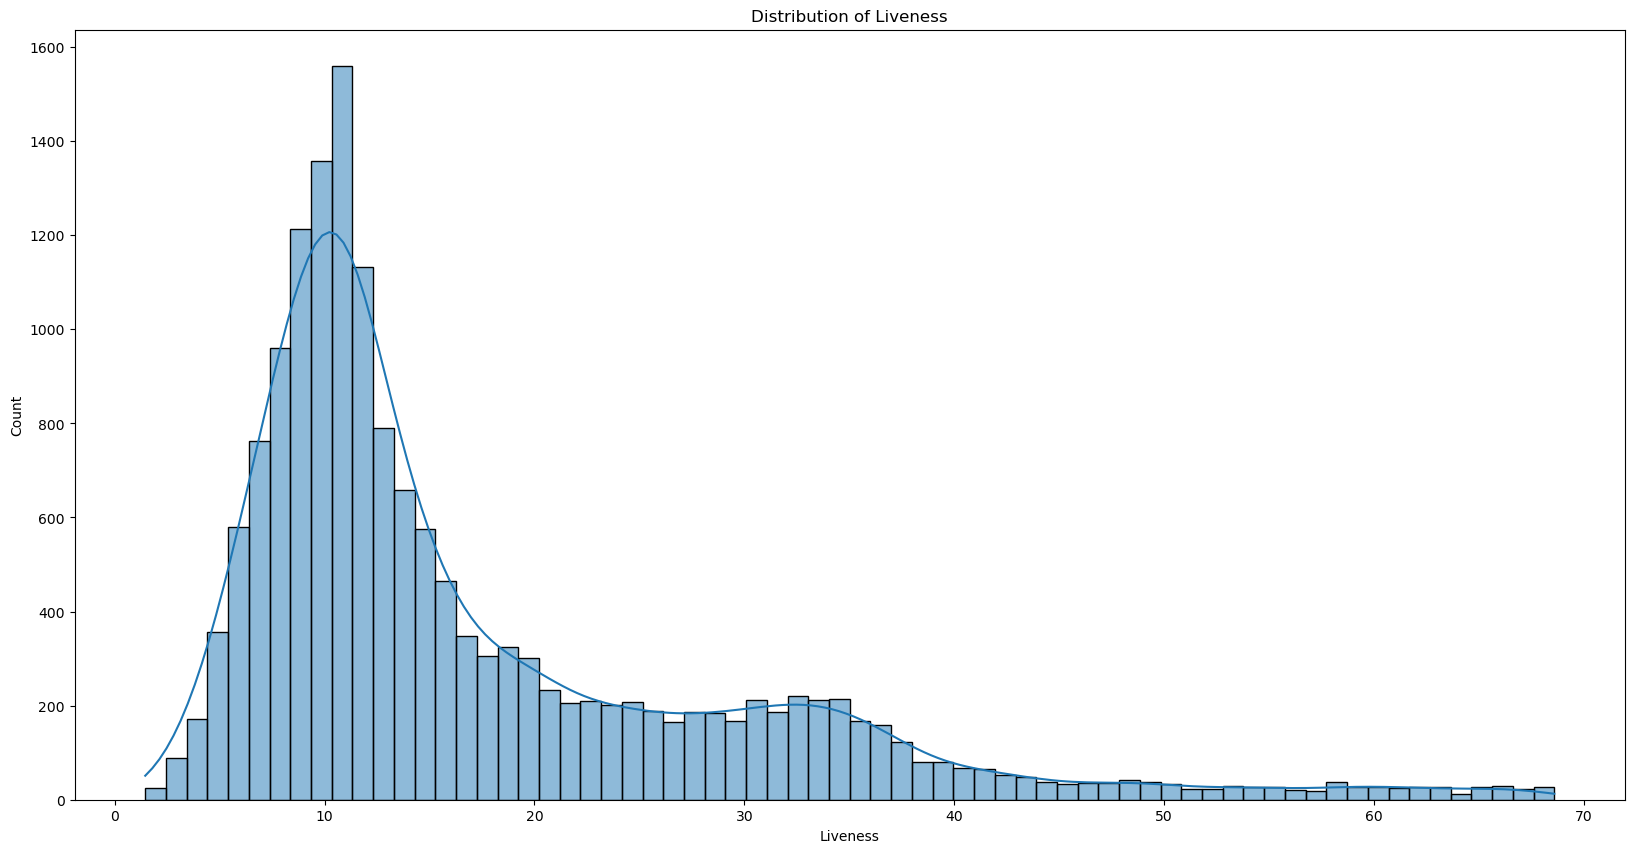

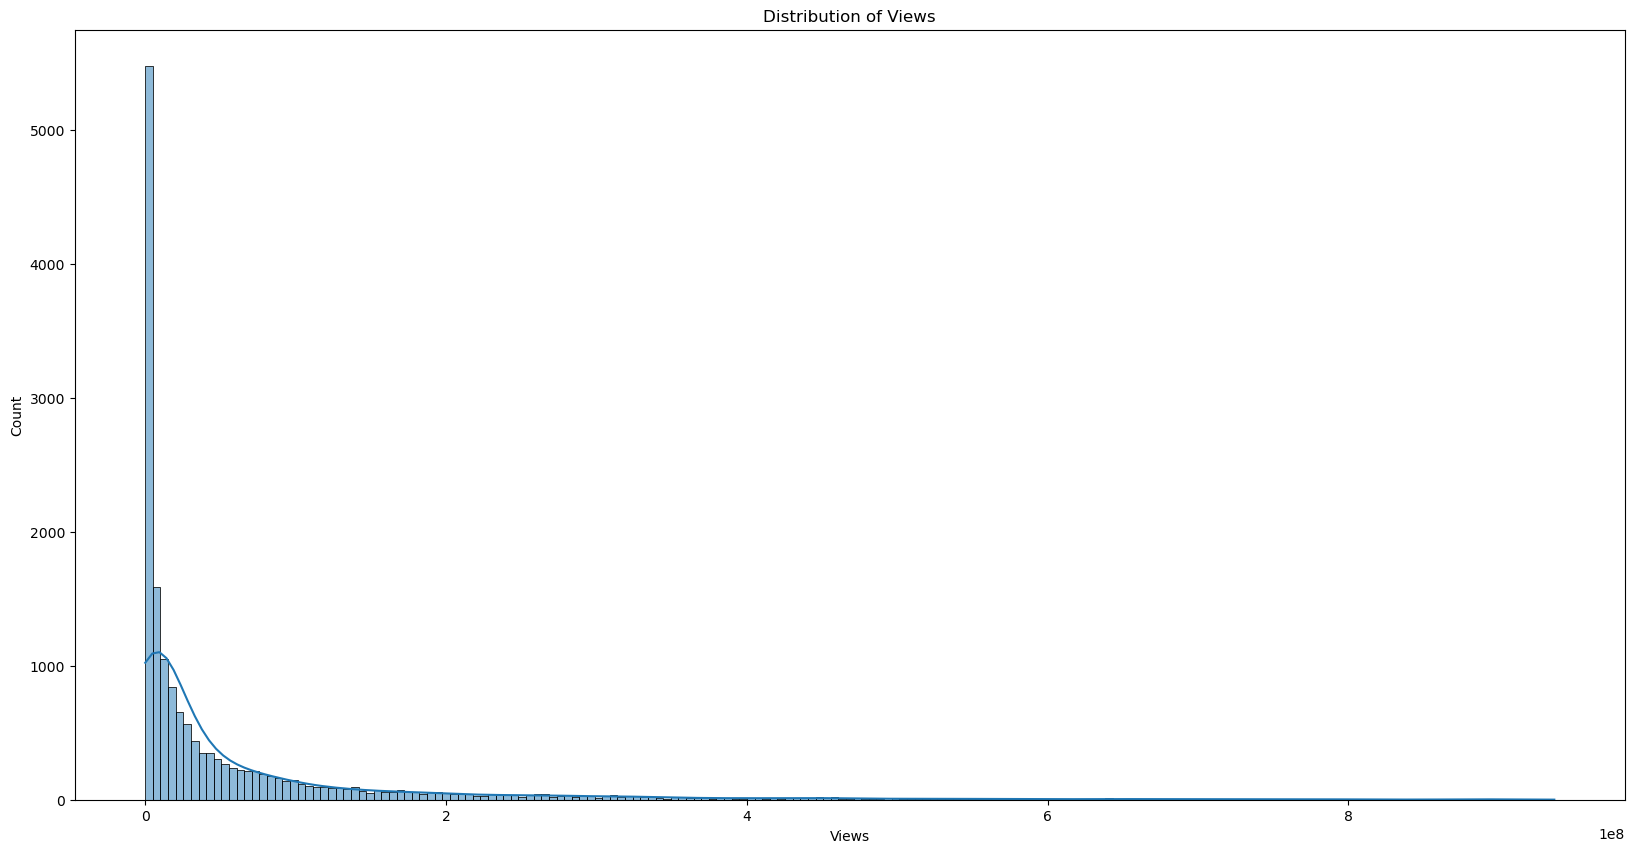

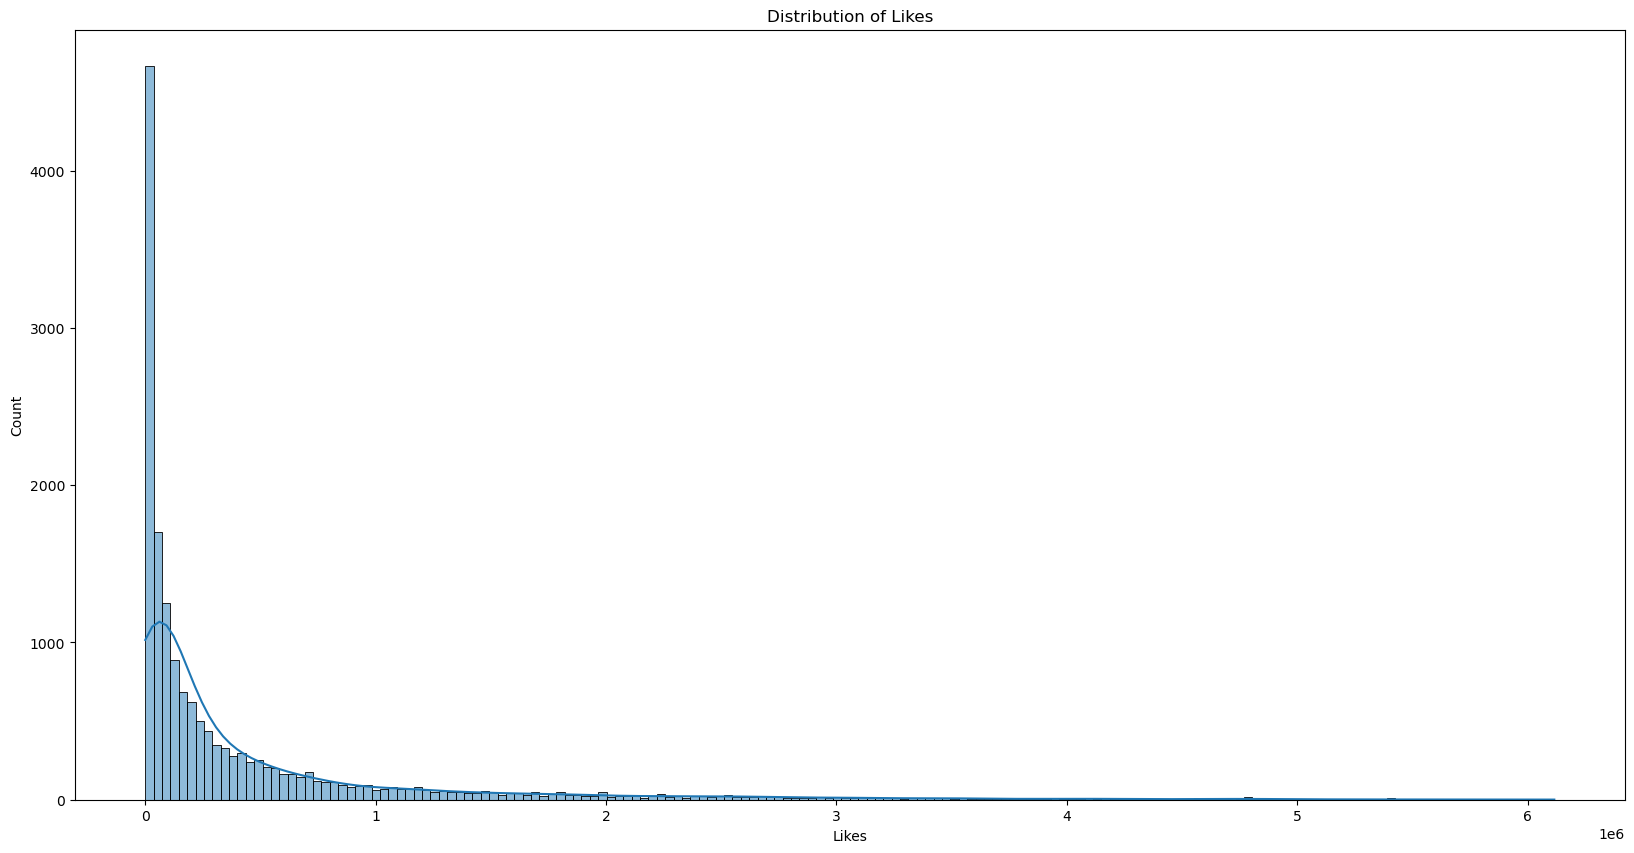

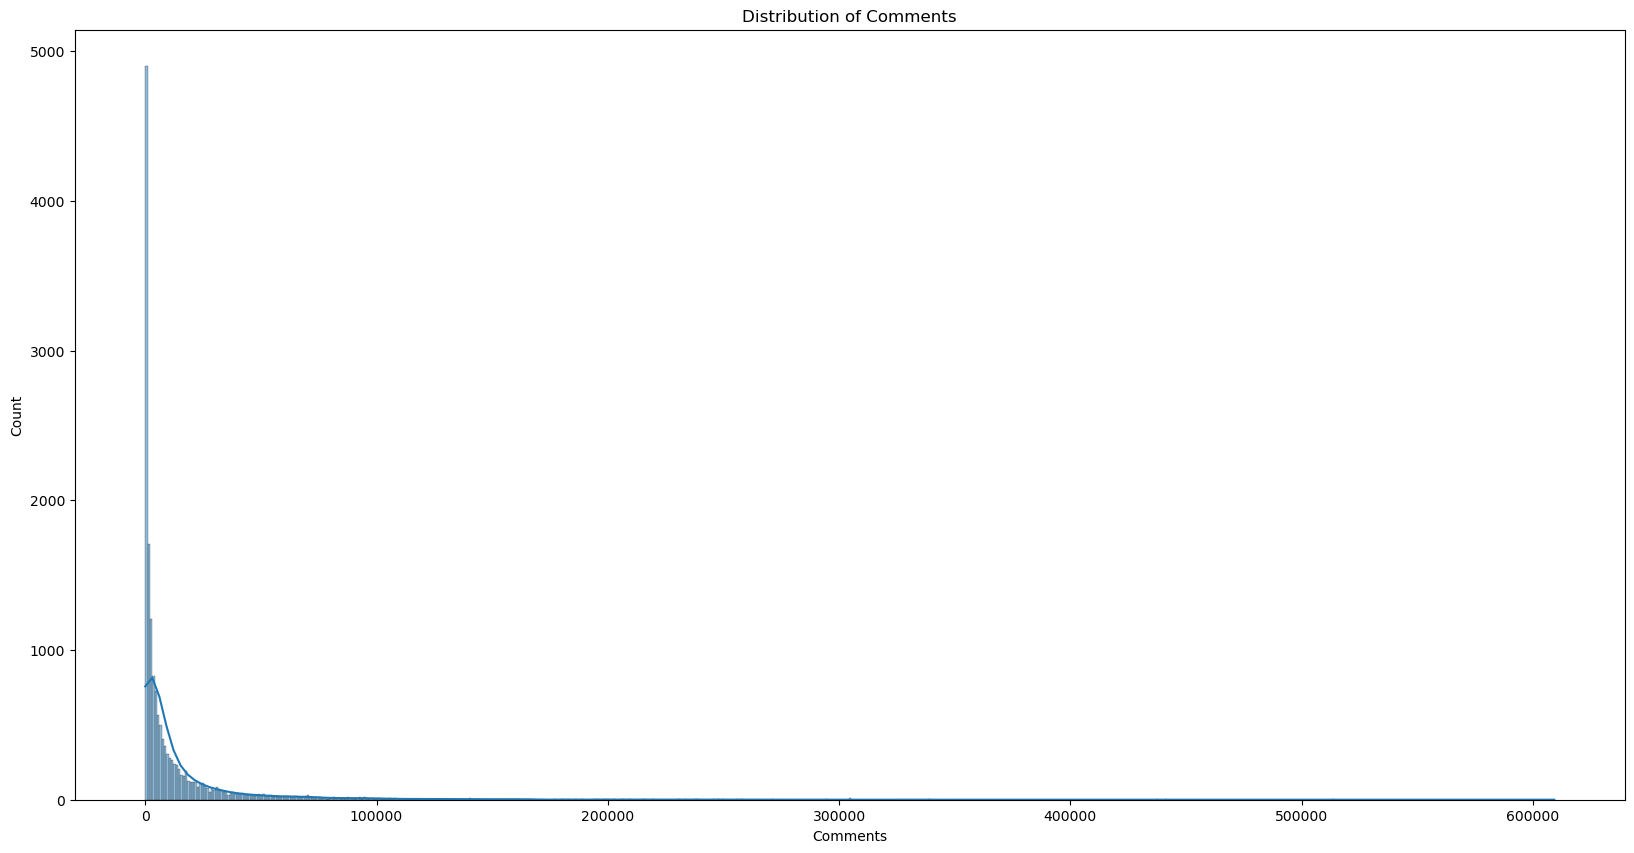

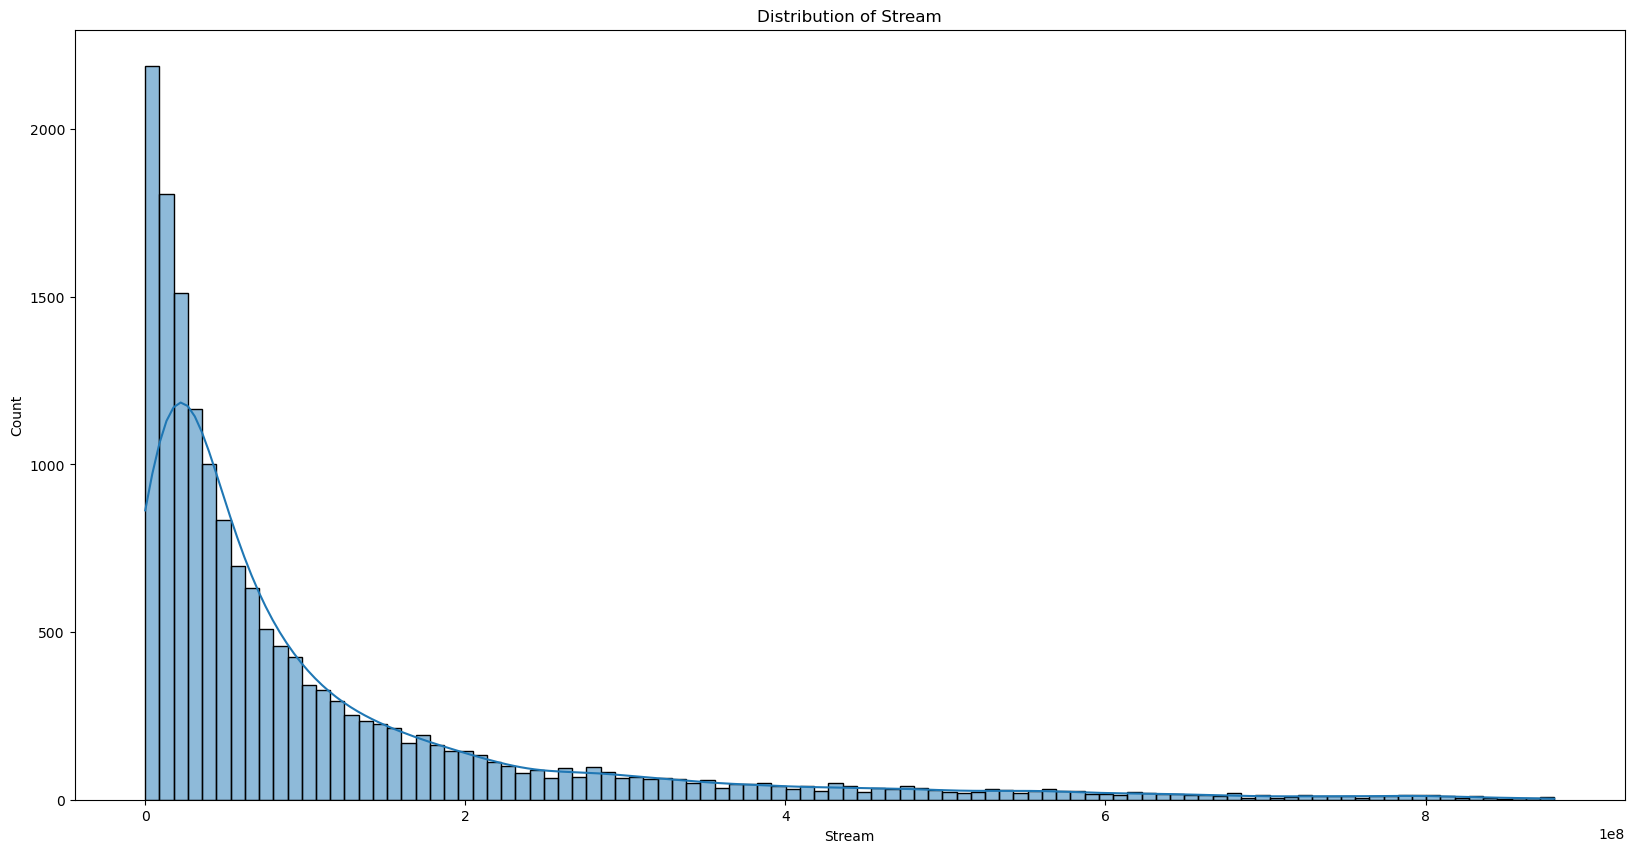

In [40]:
# Disable math text in matplotlib
plt.rcParams['text.usetex'] = False
# List of numerical features
numerical_features = ['Key','Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Views', 'Likes', 'Comments', 'Stream']

# Univariate analysis of numerical features
for feature in numerical_features:
    plt.figure(figsize=(20, 10))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

# Perforiming Bivariate Analysis

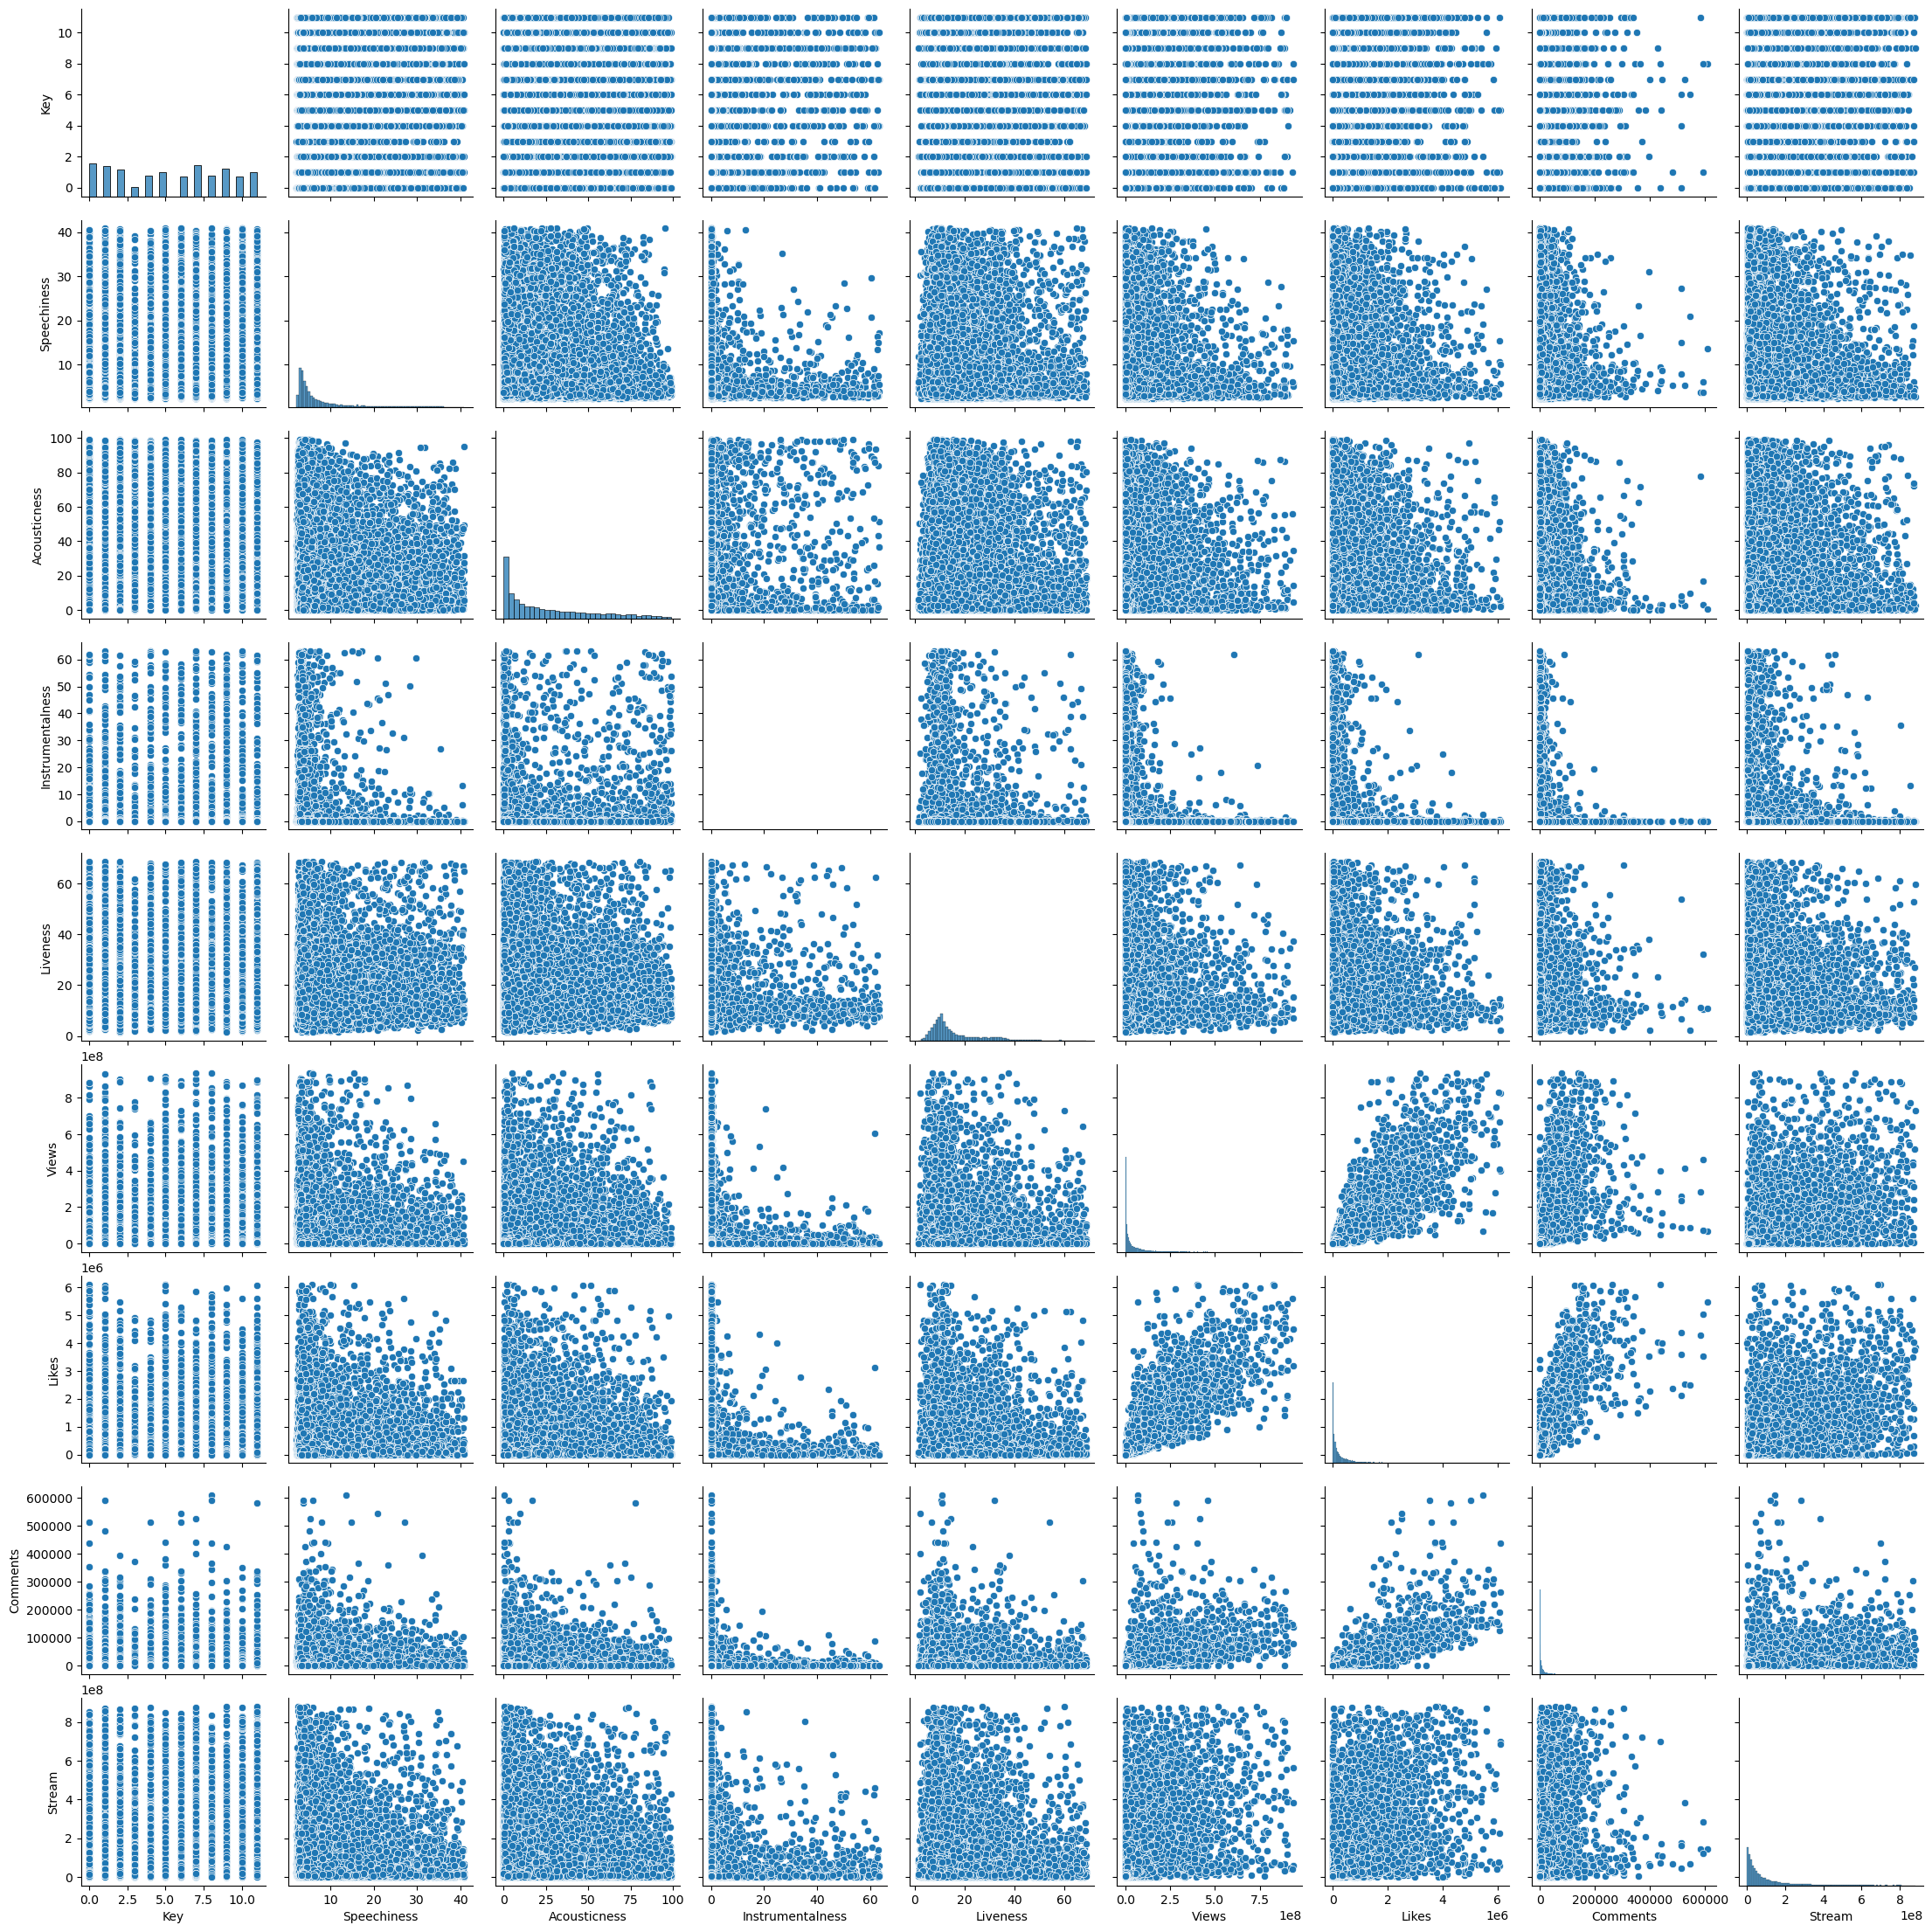

In [ ]:
# Bivariate analysis of numerical features
sns.pairplot(df[numerical_features])
plt.show()


# Implenting Variable Selection Techniques to find best set of combination of variables for building predictive models for Views as the outcome variable

Selection Used:
1. Lasso Regression
2. Backward Selection
3. Forward Selection
4. Stepwise Selection

In [44]:
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [45]:
# Drop non-numeric columns
df_numeric = df.select_dtypes(include=[np.number])
X = df_numeric.drop('Views', axis=1)
y = df_numeric['Views']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [46]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler

In [47]:
#Implementing Lasso Variable Selection.

# Define the scaler
scaler = StandardScaler()
# Scale Data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
lasso = LassoCV(cv=5, random_state=0)
lasso.fit(X_train_scaled, y_train)
coef = pd.Series(lasso.coef_, index = X_train.columns)
selected_features = coef[coef != 0].index
print('Selected features: ', selected_features)

Selected features:  Index(['Key', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness',
       'Likes', 'Comments', 'Stream'],
      dtype='object')


In [48]:
#Implementing Forward Selection

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
# Drop non-numeric columns
df_numeric = df.select_dtypes(include=[np.number])
X = df_numeric.drop('Views', axis=1)
y = df_numeric['Views']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sfs_forward = SFS(LinearRegression(),
           k_features=4,  
           forward=True,  
           floating=False, 
           scoring='neg_mean_squared_error',
           cv=5)

sfs_forward = sfs_forward.fit(X, y)
print('Selected features:', sfs_forward.k_feature_names_)

Selected features: ('Speechiness', 'Likes', 'Comments', 'Stream')


In [49]:
#Implementing Backward Selection
sfs_backward = SFS(LinearRegression(),
           k_features=3,  
           forward=False,  
           floating=False, 
           scoring='neg_mean_squared_error',
           cv=5)

sfs_backward = sfs_backward.fit(X, y)
print('Selected features:', sfs_backward.k_feature_names_)

Selected features: ('Speechiness', 'Likes', 'Comments')


In [50]:
#Implementing Stepwise Selection 
sfs_stepwise = SFS(LinearRegression(),
           k_features=5,  
           forward=True,  
           floating=True,  # Stepwise selection
           scoring='neg_mean_squared_error',
           cv=5)

sfs_stepwise = sfs_stepwise.fit(X, y)
print('Selected features:', sfs_stepwise.k_feature_names_)

Selected features: ('Speechiness', 'Instrumentalness', 'Likes', 'Comments', 'Stream')


In [51]:
#Building Predictive Models with 3 Best predictors selected based on Backward Selection
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Select only the specified predictor variables
predictors = ['Speechiness', 'Likes', 'Comments']
X = df[predictors]
y = df['Views']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor()
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    r2 = model.score(X_test, y_test)
    print(f"{name} RMSE: {rmse}, R-squared: {r2}")

Linear Regression RMSE: 59087374.830005765, R-squared: 0.7630181761000163
Ridge Regression RMSE: 59087374.73837244, R-squared: 0.7630181768350441
Lasso Regression RMSE: 59087374.82785608, R-squared: 0.7630181761172597
Decision Tree RMSE: 75906043.22507218, R-squared: 0.6089085208842218
Random Forest RMSE: 55939668.284850195, R-squared: 0.7875946651267381
Gradient Boosting RMSE: 56175014.75915626, R-squared: 0.7858036640906174


In [52]:
#Building Predictive Models with 4 Best predictors selected based on Forward Selection.
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Select only the specified predictor variables
predictors = ['Speechiness', 'Likes', 'Comments', 'Stream']
X = df[predictors]  # Features
y = df['Views']  # Target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor()
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    r2 = model.score(X_test, y_test)
    print(f"{name} RMSE: {rmse}, R-squared: {r2}")

Linear Regression RMSE: 59082900.77651787, R-squared: 0.7630540629275296
Ridge Regression RMSE: 59082900.69117327, R-squared: 0.7630540636120613


/Users/rijulgupta/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.956e+18, tolerance: 1.915e+16
  model = cd_fast.enet_coordinate_descent(


Lasso Regression RMSE: 59082900.77445575, R-squared: 0.7630540629440695
Decision Tree RMSE: 74877842.50288692, R-squared: 0.6194319791379839
Random Forest RMSE: 52740135.65752725, R-squared: 0.8111973298123719
Gradient Boosting RMSE: 55059118.69976624, R-squared: 0.7942290046969915


In [53]:
#Building Predictive Models with 5 Best predictors selected based on Stepwise Selection.
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Select only the specified predictor variables
predictors = ['Speechiness', 'Instrumentalness', 'Likes', 'Comments', 'Stream']
X = df[predictors]  # Features
y = df['Views']  # Target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor()
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    r2 = model.score(X_test, y_test)
    print(f"{name} RMSE: {rmse}, R-squared: {r2}")

Linear Regression RMSE: 59042876.18503619, R-squared: 0.7633749832596606
Ridge Regression RMSE: 59042876.13812347, R-squared: 0.763374983635683
Lasso Regression RMSE: 59042876.18529919, R-squared: 0.7633749832575525
Decision Tree RMSE: 75067469.02664551, R-squared: 0.6175019777493181
Random Forest RMSE: 53348326.01370028, R-squared: 0.8068177410931527
Gradient Boosting RMSE: 54700434.857611954, R-squared: 0.7969012713495647


In [76]:
#Building Predictive Models with Best predictors selected based on Lasso Regression Variable Selection
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Select only the specified predictor variables
predictors = ['Key', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness',
       'Likes', 'Comments', 'Stream']
X = df[predictors]  # Features
y = df['Views']  # Target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor()
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    r2 = model.score(X_test, y_test)
    print(f"{name} RMSE: {rmse}, R-squared: {r2}")

Linear Regression RMSE: 59028251.237374924, R-squared: 0.7634921929929632
Ridge Regression RMSE: 59028251.25480967, R-squared: 0.7634921928532521
Lasso Regression RMSE: 59028251.243779086, R-squared: 0.7634921929416443
Decision Tree RMSE: 70686295.9808716, R-squared: 0.6608466612476736
Random Forest RMSE: 52092128.28547726, R-squared: 0.8158083875313038
Gradient Boosting RMSE: 53719419.64068315, R-squared: 0.8041208227223974


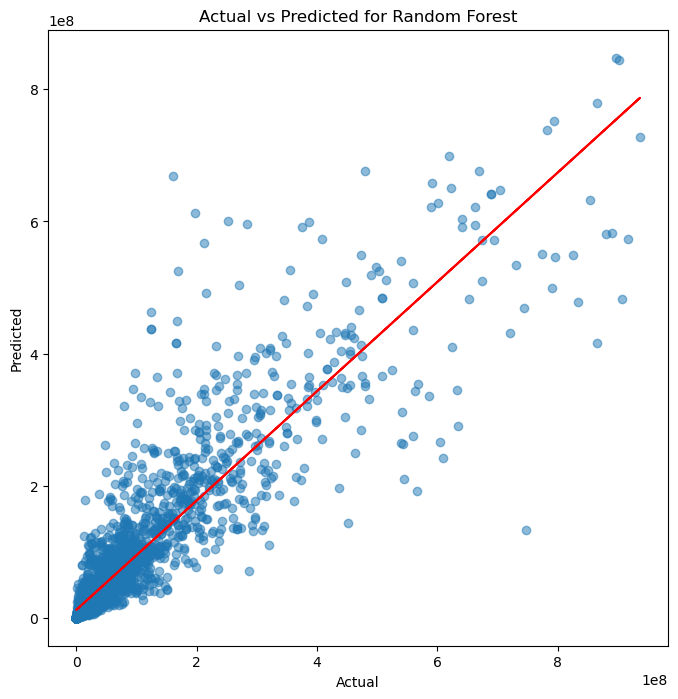

In [75]:
# Create scatter plot for actual vs predicted values
plt.figure(figsize=(8, 8))
plt.scatter(y_test, predictions, alpha=0.5)
# Calculate the line of best fit
m, b = np.polyfit(y_test, predictions, 1)

# Plot the line of best fit
plt.plot(y_test, m*y_test + b, color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Actual vs Predicted for {name}')
plt.show()

In [56]:
# Calculate the standard deviation of Views
std_dev = df['Views'].std()
print(f"Standard Deviation of Views: {std_dev}")

Standard Deviation of Views: 120576506.73124725


Based on the Analysis Lasso Regression technique gives the best set of predictors and Random Forest gives the best results with the lowest RMSE out of all the models.

# Implenting Variable Selection Techniques to find best set of combination of variables for building predictive models for Stream as the outcome variable

Selection Used:
1. Lasso Regression
2. Backward Selection
3. Forward Selection
4. Stepwise Selection

In [59]:
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# Drop non-numeric columns
df_numeric = df.select_dtypes(include=[np.number])
X = df_numeric.drop('Stream', axis=1)
y = df_numeric['Stream']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler

#Implementing Lasso Variable Selection.

# Define the scaler
scaler = StandardScaler()
# Scale Data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
lasso = LassoCV(cv=5, random_state=0)
lasso.fit(X_train_scaled, y_train)
coef = pd.Series(lasso.coef_, index = X_train.columns)
selected_features = coef[coef != 0].index
print('Selected features: ', selected_features)

#Implementing Forward Selection

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
# Drop non-numeric columns
df_numeric = df.select_dtypes(include=[np.number])
X = df_numeric.drop('Stream', axis=1)
y = df_numeric['Stream']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sfs_forward = SFS(LinearRegression(),
           k_features=4,  
           forward=True,  
           floating=False, 
           scoring='neg_mean_squared_error',
           cv=5)

sfs_forward = sfs_forward.fit(X, y)
print('Selected features:', sfs_forward.k_feature_names_)

#Implementing Backward Selection
sfs_backward = SFS(LinearRegression(),
           k_features=3,  
           forward=False,  
           floating=False, 
           scoring='neg_mean_squared_error',
           cv=5)

sfs_backward = sfs_backward.fit(X, y)
print('Selected features:', sfs_backward.k_feature_names_)

#Implementing Stepwise Selection 
sfs_stepwise = SFS(LinearRegression(),
           k_features=5,  
           forward=True,  
           floating=True,  # Stepwise selection
           scoring='neg_mean_squared_error',
           cv=5)

sfs_stepwise = sfs_stepwise.fit(X, y)
print('Selected features:', sfs_stepwise.k_feature_names_)

Selected features:  Index(['Key', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness',
       'Views', 'Likes', 'Comments'],
      dtype='object')
Selected features: ('Acousticness', 'Views', 'Likes', 'Comments')
Selected features: ('Acousticness', 'Likes', 'Comments')
Selected features: ('Speechiness', 'Acousticness', 'Views', 'Likes', 'Comments')


In [65]:
#Building Predictive Models with 3 Best predictors selected based on Backward Selection
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Select only the specified predictor variables
predictors = ['Acousticness', 'Likes', 'Comments']
X = df[predictors]  # Features
y = df['Stream']  # Target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor()
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    r2 = model.score(X_test, y_test)
    print(f"{name} RMSE: {rmse}, R-squared: {r2}")

Linear Regression RMSE: 127192226.48675454, R-squared: 0.30302133168124223
Ridge Regression RMSE: 127192226.48492487, R-squared: 0.3030213317012943
Lasso Regression RMSE: 127192226.48668663, R-squared: 0.3030213316819864
Decision Tree RMSE: 161979762.19994307, R-squared: -0.13036801733876047
Random Forest RMSE: 120381165.28081521, R-squared: 0.3756682333161051
Gradient Boosting RMSE: 121592654.00345863, R-squared: 0.3630387349182278


In [62]:
#Building Predictive Models with 4 Best predictors selected based on Forward Selection.
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Select only the specified predictor variables
predictors = ['Acousticness', 'Views', 'Likes', 'Comments']
X = df[predictors]  # Features
y = df['Stream']  # Target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor()
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    r2 = model.score(X_test, y_test)
    print(f"{name} RMSE: {rmse}, R-squared: {r2}")

Linear Regression RMSE: 127172095.59560134, R-squared: 0.30324193779465436
Ridge Regression RMSE: 127172095.59312174, R-squared: 0.3032419378218252


/Users/rijulgupta/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.404e+19, tolerance: 2.861e+16
  model = cd_fast.enet_coordinate_descent(


Lasso Regression RMSE: 127172095.59550893, R-squared: 0.3032419377956669
Decision Tree RMSE: 163490135.01140282, R-squared: -0.1515464264235089
Random Forest RMSE: 117545524.992119, R-squared: 0.40473472718935644
Gradient Boosting RMSE: 121149634.82806979, R-squared: 0.36767177773683235


In [66]:
#Building Predictive Models with 5 Best predictors selected based on stepwise Selection.
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Select only the specified predictor variables
predictors = ['Speechiness','Acousticness', 'Views', 'Likes', 'Comments']
X = df[predictors]  # Features
y = df['Stream']  # Target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor()
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    r2 = model.score(X_test, y_test)
    print(f"{name} RMSE: {rmse}, R-squared: {r2}")

Linear Regression RMSE: 126964781.37374558, R-squared: 0.30551177720158496
Ridge Regression RMSE: 126964781.44254754, R-squared: 0.30551177644890115
Lasso Regression RMSE: 126964781.3749903, R-squared: 0.30551177718796774
Decision Tree RMSE: 158048250.28373832, R-squared: -0.07616219495955856
Random Forest RMSE: 115982722.64109991, R-squared: 0.4204579592155526
Gradient Boosting RMSE: 120012911.10065308, R-squared: 0.3794821376411909


In [60]:
#Building Predictive Models with Best predictors selected based on Lasso Regression Variable Selection
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Select only the specified predictor variables
predictors = ['Key', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness',
       'Views', 'Likes', 'Comments']
X = df[predictors]  # Features
y = df['Stream']  # Target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor()
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    r2 = model.score(X_test, y_test)
    print(f"{name} RMSE: {rmse}, R-squared: {r2}")

Linear Regression RMSE: 127039944.03581928, R-squared: 0.30468926509994965
Ridge Regression RMSE: 127039943.73129037, R-squared: 0.30468926843342437
Lasso Regression RMSE: 127039944.02497627, R-squared: 0.3046892652186408
Decision Tree RMSE: 158830792.17340747, R-squared: -0.08684534821850409
Random Forest RMSE: 116882184.73541348, R-squared: 0.4114342465446442
Gradient Boosting RMSE: 121280148.83610155, R-squared: 0.36630863464244645


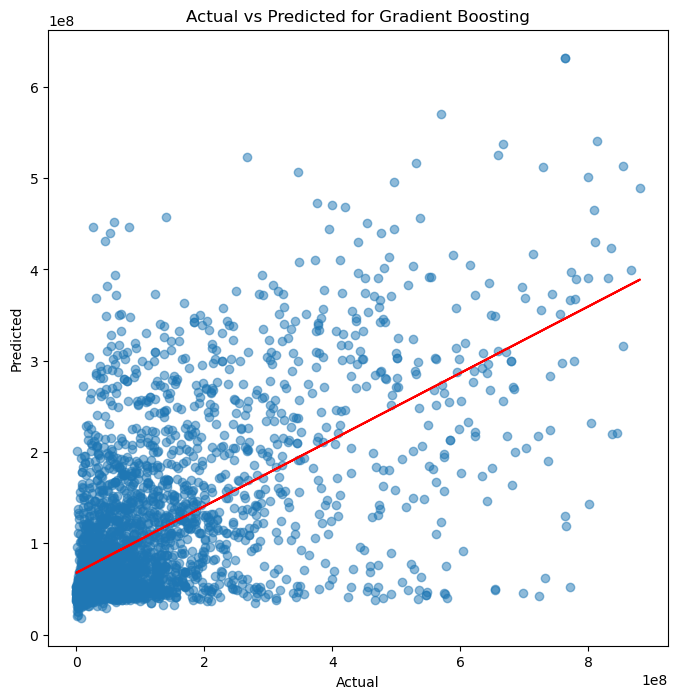

In [68]:
# Create scatter plot for actual vs predicted values
plt.figure(figsize=(8, 8))
plt.scatter(y_test, predictions, alpha=0.5)
# Calculate the line of best fit
m, b = np.polyfit(y_test, predictions, 1)

# Plot the line of best fit
plt.plot(y_test, m*y_test + b, color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Actual vs Predicted for {name}')
plt.show()